## 딥러닝
### 심층신경망

In [1]:
# 모듈 로드
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

- 이미 이전장에서 다운로드 했기 때문에 다시 다운로드 하지 않음

In [3]:
# 훈련세트, 검증세트 분리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
train_input = train_input.reshape(-1, 28*28)
test_input = test_input.reshape(-1, 28*28)

In [5]:
# 스케일링
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input.astype(np.float64))
test_scaled = scaler.transform(test_input.astype(np.float64))

In [6]:
# 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [7]:
print(train_scaled.shape, test_scaled.shape)
print(train_target.shape, test_target.shape)

(48000, 784) (10000, 784)
(48000,) (10000,)


#### 심층신경망 만들기1

In [8]:
# 밀집층 생성
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hiiden')
dense2 = keras.layers.Dense(10, activation='softmax', name='output')

In [9]:
# 신경망 모델 생성
model =keras.Sequential([dense1, dense2])

In [10]:
# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiiden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 심층신경망 만들기2

In [11]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_Model')

In [12]:
model.summary()

Model: "Fashion_MNIST_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# 모델 훈련전 설정
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [14]:
# 훈련
model.fit(train_scaled, train_target, epochs=10)

Epoch 1/10


1500/1500 [==============================] - 2s 1ms/step - loss: 0.4725 - accuracy: 0.8354
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3591 - accuracy: 0.8693
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3226 - accuracy: 0.8842
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2958 - accuracy: 0.8920
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2771 - accuracy: 0.9008
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2592 - accuracy: 0.9077
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2447 - accuracy: 0.9124
Epoch 8/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2301 - accuracy: 0.9181
Epoch 9/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2187 - accuracy: 0.9231
Epoch 10/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2

In [15]:
model.evaluate(val_scaled, val_target)
# 검증 정확도 : 87.8%

375/375 [==============================] - 0s 834us/step - loss: 0.3359 - accuracy: 0.8867


[0.33590880036354065, 0.8866666555404663]

In [16]:
pred_result = model.predict(test_scaled)

313/313 [==============================] - 0s 775us/step


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
# 한글로 Matplotlib 사용 시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

In [19]:
class_names = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [20]:
# 테스트이미지와 예측결과 시각화
def show_image(index):
    plt.figure(figsize=(2,2))
    plt.imshow(test_input[index].reshape(28,28), cmap='gray_r')
    true_label = class_names[test_target[index]]
    pred_label = class_names[np.argmax(pred_result[index])]

    #plt.title(f'실제: {true_label}, 예측: {pred_label}')
    plt.text(0, -6, f'실제: {true_label}', fontsize=12, color='blue')
    plt.text(0, -3, f'예측: {pred_label}', fontsize=12, color='red', fontweight='bold')
    plt.axis('off')
    plt.show()

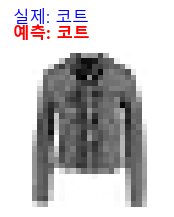

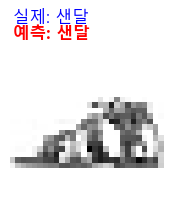

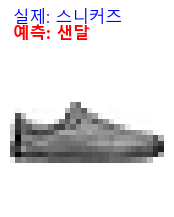

In [21]:
for i in range(10,13):
    show_image(i)

#### 렐루 함수
- 인공신경망 은닉층에 초기에는 Sigmoid 함수 사용
    - 단점 : 오른쪽, 왼쪽 끝으로 갈수록 그래프가 누워있어서 올바른 출력을 못만듦

- 렐루함수(ReLU) : 수정된 선형유닛 뜻의 함수

    <img src='../image/ml10.png' width='500'>

#### Flatten 객체
- 이미지 2차원배열을 1차원으로 변경할 때 np.reshape() 사용
- Flatten 클래스가 위의 일을 대신해줌

In [22]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [23]:
model2.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [25]:
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0

In [26]:
# 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [27]:
# 모델 설정
model2.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [28]:
# 모델 훈련
model2.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5359 - accuracy: 0.8110
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3932 - accuracy: 0.8569
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3533 - accuracy: 0.8729
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3313 - accuracy: 0.8809
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3184 - accuracy: 0.8866
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3035 - accuracy: 0.8907
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2955 - accuracy: 0.8931
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2877 - accuracy: 0.8983
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2779 - accuracy: 0.9009
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.272

In [29]:
model2.evaluate(val_scaled, val_target)
# ReLU 함수 사용 시, Sigmoid 함수 사용 시 0.01% 개선

375/375 [==============================] - 0s 829us/step - loss: 0.4351 - accuracy: 0.8811


[0.43514713644981384, 0.8810833096504211]

### 옵티마이저
- 하이퍼파라미터 값 최적화

In [30]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [31]:
# 모델3 설정, 최적화는 adam 클래스만 사용할 것
model3.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [32]:
# 모델 훈련. 모델훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작
model3.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5217 - accuracy: 0.8161
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3977 - accuracy: 0.8576
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3561 - accuracy: 0.8721
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3286 - accuracy: 0.8783
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3111 - accuracy: 0.8862
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2948 - accuracy: 0.8908
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2811 - accuracy: 0.8964
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2708 - accuracy: 0.8988
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2600 - accuracy: 0.9035
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.248

- optimizer 사용 시 0.01 정도 개선

In [33]:
model3.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 844us/step - loss: 0.3625 - accuracy: 0.8811


[0.36252540349960327, 0.8810833096504211]

#### 드롭아웃
- 훈련과정 밀집층에 일부 뉴런을 꺼버림

In [34]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dropout(0.3, name='dropout'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [35]:
model4.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model4.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [37]:
model4.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5862 - accuracy: 0.7940
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4392 - accuracy: 0.8426
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4042 - accuracy: 0.8535
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3827 - accuracy: 0.8617
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3641 - accuracy: 0.8641
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3512 - accuracy: 0.8727
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3398 - accuracy: 0.8751
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3305 - accuracy: 0.8765
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3246 - accuracy: 0.8800
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.321

In [38]:
model4.evaluate(val_scaled, val_target)
# 훈련 89%, 검증 88% - 1차이(훈련과 검증사이에 차이가 거의 없음)

375/375 [==============================] - 0s 864us/step - loss: 0.3235 - accuracy: 0.8835


[0.32350924611091614, 0.8834999799728394]

- 드롭아웃하면 정확도가 떨어짐 > 훈련과 검증(테스트) 사이에 정확도 차이가 줄어듦
- `과대적합`(훈련세트 훈련에 너무 치중하여서 정확도가 너무 높은 것) 방지

#### 모델의 저장과 복원
- 훈련시간이 딥러닝에 크게 좌우됨. 저장이 없으면 다시 훈련시키고 시간을 소요해야 됨
- 파일로 저장 후 모델에 대한 구조와 파라미터만 저장하는 두가지 방법이 존재

In [39]:
# 모델4 저장 - 파라미터만 저장
model4.save_weights('./model4-weight.h5')

In [40]:
# 모델4 저장 - 전체(모델 구조와 파라미터) 저장
model4.save('./model4-whole.h5')

c:\Source\iot-dataanalysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##### 모델 사용
- 파라미터만 저장한 파일을 사용하려면 먼저 모델을 생성해야함

In [41]:
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name='flatten5'),
    keras.layers.Dense(100, activation='relu', name='hidden5'),
    keras.layers.Dropout(0.3, name='dropout5'),
    keras.layers.Dense(10, activation='softmax', name='output5')
], name='Fashion_MNIST_RELU5')

In [42]:
model5.load_weights('./model4-weight.h5')

In [43]:
pred_result = model5.predict(test_scaled)

313/313 [==============================] - 0s 774us/step


- 모델까지 전부 생성해주는 방법

In [44]:
model6 = keras.models.load_model('./model4-whole.h5')

In [45]:
model6.evaluate(test_scaled, test_target)

313/313 [==============================] - 0s 870us/step - loss: 0.3465 - accuracy: 0.8764


[0.34652188420295715, 0.8763999938964844]

#### 콜백
- 실행도중 다른 일을 할 수 있도록 해주는 기능
- `조기종료`를 위해서 사용

In [46]:
model7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dropout(0.3, name='dropout'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [47]:
model7.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [48]:
# 에포크마다 모델 저장기능
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best-model.h5', save_best_only=True) # 최고 상태면 저장
# 조기종료 콜백
## 두번이상 훈련값이 동일하면 조기종료. 이전 최고상태로 복구
early_stop_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [49]:
# 모델 훈련. 모델훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작
model7.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
           callbacks=[checkpoint_cb, early_stop_cb])

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5900 - accuracy: 0.7932 - val_loss: 0.4182 - val_accuracy: 0.8520
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4403 - accuracy: 0.8420 - val_loss: 0.3873 - val_accuracy: 0.8579
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4045 - accuracy: 0.8537 - val_loss: 0.3708 - val_accuracy: 0.8648
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3807 - accuracy: 0.8609 - val_loss: 0.3511 - val_accuracy: 0.8695
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3678 - accuracy: 0.8660 - val_loss: 0.3422 - val_accuracy: 0.8738
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3565 - accuracy: 0.8690 - val_loss: 0.3560 - val_accuracy: 0.8657
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3466 - accuracy: 0.8730 - val_loss: 0.3429 - val_accuracy:

In [50]:
model7.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 999us/step - loss: 0.3422 - accuracy: 0.8738


[0.34222689270973206, 0.8738333582878113]

In [51]:
model7.evaluate(test_scaled, test_target)

313/313 [==============================] - 0s 881us/step - loss: 0.3683 - accuracy: 0.8684


[0.3683462142944336, 0.868399977684021]

In [52]:
early_stop_cb.stopped_epoch

6

#### 결론
- `심층 신경망` : 2개 이상의 밀집층을 포함한 신경망 모델. 다층 인공신경망
- `렐루함수` : 시그모이드 함수의 단점을 보완한 활성화 함수
- `옵티마이저` : 신경망의 가중치(기울기)와 절편을 학습하기 위한 알고리즘 또는 방법. Adam, SGD(확률적 경사하강법), RMSprop ...

- `드롭아웃` : 밀집층의 뉴런을 임의로 꺼서 훈련을 덜 시키는 것. 과대적합 막기위해서 수행
- 모델 저장과 복원 : 이미 훈련된 데이터를 저장했다가 나중에 다시 쓰기위해서
- `콜백` : 에포크마다 모델 저장 또는 조기종료를 위해서 훈련 도중에 다른 기능을 수행하는 것